In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup 
import re
from datetime import datetime
import os
from selenium import webdriver
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

In [2]:
headers = {'user-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36'}

In [3]:
query = '코로나'
base_url = f'https://search.naver.com/search.naver?where=news&sm=tab_jum&query={query}'

response = requests.get(base_url, headers=headers)
html = response.text
soup = BeautifulSoup(html, 'html.parser')
news_list = soup.select('div.news_area')
next_page = soup.select('div.sc_page_inner > a.btn')

for news in news_list :
    if news.select('a.info')[-1].text == '네이버뉴스' :
        link = news.select('a.info')[-1]['href']
        title = news.select_one('a.news_tit').text
        text = news.select_one('a.api_txt_lines.dsc_txt_wrap').text

In [29]:
link = 'https://n.news.naver.com/mnews/article/003/0011816368'
driver = webdriver.Chrome('chromedriver.exe')
driver.get(link)

while True :
    time.sleep(1.5)
    try : 
        driver.find_element(By.XPATH, './/*[@id="cbox_module"]/div[2]/div[9]/a/span[1]').click()
        html2 = driver.page_source
        soup2 = BeautifulSoup(html2, 'lxml')
        comment_list = soup2.find_all("span", {'class' : "u_cbox_contents"})
    except :
        break



<html data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36" lang="ko"><head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" name="viewport"/>
<meta content='尹 방미에 中매체 경고…"美 아첨·中 관계 희생 말라"' property="og:title"/>
<meta content="article" property="og:type"/>
<meta content="https://n.news.naver.com/mnews/article/003/0011816368" property="og:url"/>
<meta content="https://imgnews.pstatic.net/image/003/2023/04/21/NISI20221118_0019479274_web_20221118155548_20230421094907279.jpg?type=w800" property="og:image"/>
<meta content='기사내용 요약 관영 글로벌타임스 "한미동맹은 불평등" "윤 대통령 방미 실질적 결과 없을 수도" "중국 봉쇄와 북한 저지 압력 가해질 것" [서울=뉴시스] 문예성 기자 = 오는 24~30일 윤석열 대통령의 미국 국빈' property="og:description"/>
<meta content="뉴시스 | 네이버" property="og:article:author"/>
<meta content="summary_large_image" name="twitter:car
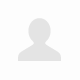
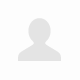

In [30]:
soup2

In [32]:
soup2.find_all("span", {'class' : "u_cbox_contents"}).text

AttributeError: ResultSet object has no attribute 'text'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?